In [3]:
%tensorflow_version 2.x

In [4]:
from google.colab import drive #toimport google drive data

In [6]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
cd /content/drive/"My Drive/"

/content/drive/My Drive


In [8]:
cd "Project Dataset/"

/content/drive/My Drive/Project Dataset


In [9]:
ls

dataset/


In [10]:
#load basic libraries
import pandas as pd
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [11]:
df = pd.read_csv('dataset/Tagrecommendation.csv') #loading csv file

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df.columns

Index(['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id', 'tags',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date', 'title', 'body'],
      dtype='object')

In [ ]:
tags=df['tags']

In [ ]:
body=df['body']

In [ ]:
title=df['title']

In [ ]:
title[2]

"How do I calculate someone's age in C#?"

In [ ]:
tags[2]

'<c#><.net><datetime>'

In [ ]:
pip install surprise

In [ ]:
# Standard Libraries
import pandas as pd
import numpy as np
import json

# Data Preprocessing & NLP
import nltk
import re
import string
import gensim
from textblob import Word

from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
nltk.download('wordnet')
nltk.download('punkt')

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import linear_kernel

# Performance metrics
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Lemmatization process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
lemmatization process. 
'''
lemmatizer = WordNetLemmatizer()
def tokenize_and_lemmatize(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lem

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id', 'tags',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date', 'title', 'body'],
      dtype='object')

In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=df.drop(labels = ['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date', 'body'], axis=1)

In [ ]:
data_raw = df.iloc[:15000,]
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 15000
Number of columns in data = 2


**Sample data:**


,tags,title
0,<c#><floating-point><type-conversion><double><...,Convert Decimal to Double?
1,<html><css><css3><internet-explorer-7>,Percentage width child element in absolutely p...
2,<c#><.net><datetime>,How do I calculate someone's age in C#?
3,<c#><datetime><time><datediff><relative-time-s...,Calculate relative time in C#
4,<javascript><html><browser><timezone><timezone...,Determine a User's Timezone


In [ ]:
for i in range(len(data_raw)):
  tags=[]
  tg=data_raw['tags'][i].split('>')
  for k in range(len(tg)-1):
    tags.append(tg[k].replace('<',''))
  data_raw['tags'][i]=tags

In [ ]:
data_raw

,tags,title
0,"[c#, floating-point, type-conversion, double, ...",Convert Decimal to Double?
1,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?
3,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#
4,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone
...,...,...
14995,"[ms-access, ms-access-2007]",Insert SQL command with Datetime in MS-Access
14996,"[sql, stored-procedures, function, plsql]",What is the difference between function and pr...
14997,"[browser, printing, webpage]",link to Print in a webpage
14998,"[c#, visual-studio, visual-c++]",Using c++ library in c#


In [ ]:
# Data Cleaning & Preprocessing techniques
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [ ]:
import re
# creating clean text feature
features = ['title']
for feature in features:
    data_raw['clean_' + feature] = data_raw[feature].apply(clean_text)

In [ ]:
data_raw

,tags,title,clean_title
0,"[c#, floating-point, type-conversion, double, ...",Convert Decimal to Double?,convert decimal to double
1,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...,percentage width child element in absolutely p...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?,how do i calculate someone s age in c
3,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#,calculate relative time in c
4,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone,determine a user s timezone
...,...,...,...
14995,"[ms-access, ms-access-2007]",Insert SQL command with Datetime in MS-Access,insert sql command with datetime in ms access
14996,"[sql, stored-procedures, function, plsql]",What is the difference between function and pr...,what is the difference between function and pr...
14997,"[browser, printing, webpage]",link to Print in a webpage,link to print in a webpage
14998,"[c#, visual-studio, visual-c++]",Using c++ library in c#,using c library in c


In [ ]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 55.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    freq_dist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
    
    fig = plt.figure(figsize=(21,16))
    ax1 = fig.add_subplot(2,1,1)
    wordcloud = WordCloud(width=1000, height=300, background_color='black', 
                          max_words=1628, relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False).generate_from_frequencies(freq_dist)
    
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    
    # select top 20 most frequent word
    ax2 = fig.add_subplot(2,1,2)
    d = words_df.nlargest(columns="count", n = terms) 
    ax2 = sns.barplot(data=d, palette = sns.color_palette('BuGn_r'), x= "count", y = "word")
    ax2.set(ylabel= 'Word')
    plt.show()

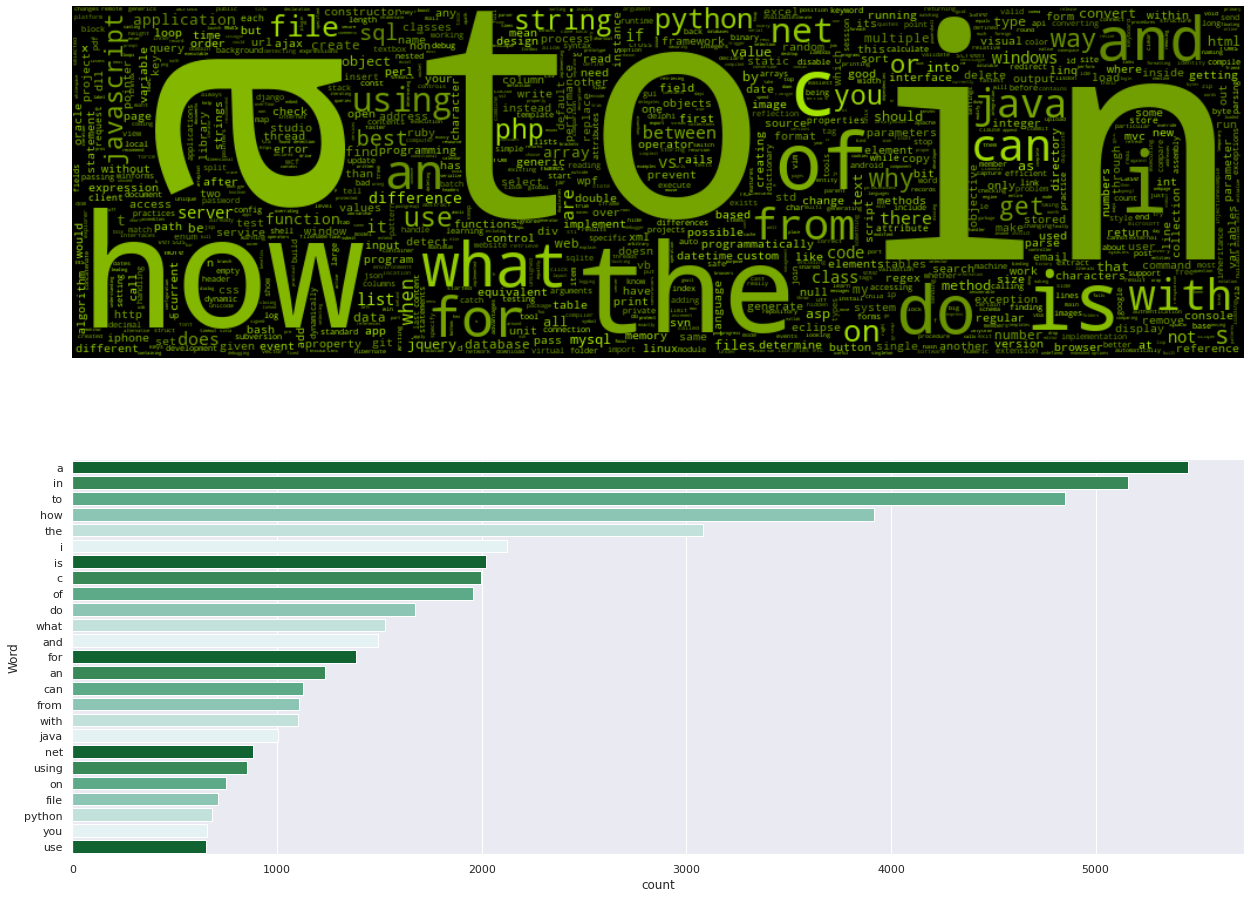

In [ ]:
freq_words(data_raw['clean_title'], 25)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# stopwords-to compare text data with and without stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
data_raw['clean_title'] = data_raw['clean_title'].apply(lambda x: remove_stopwords(x))

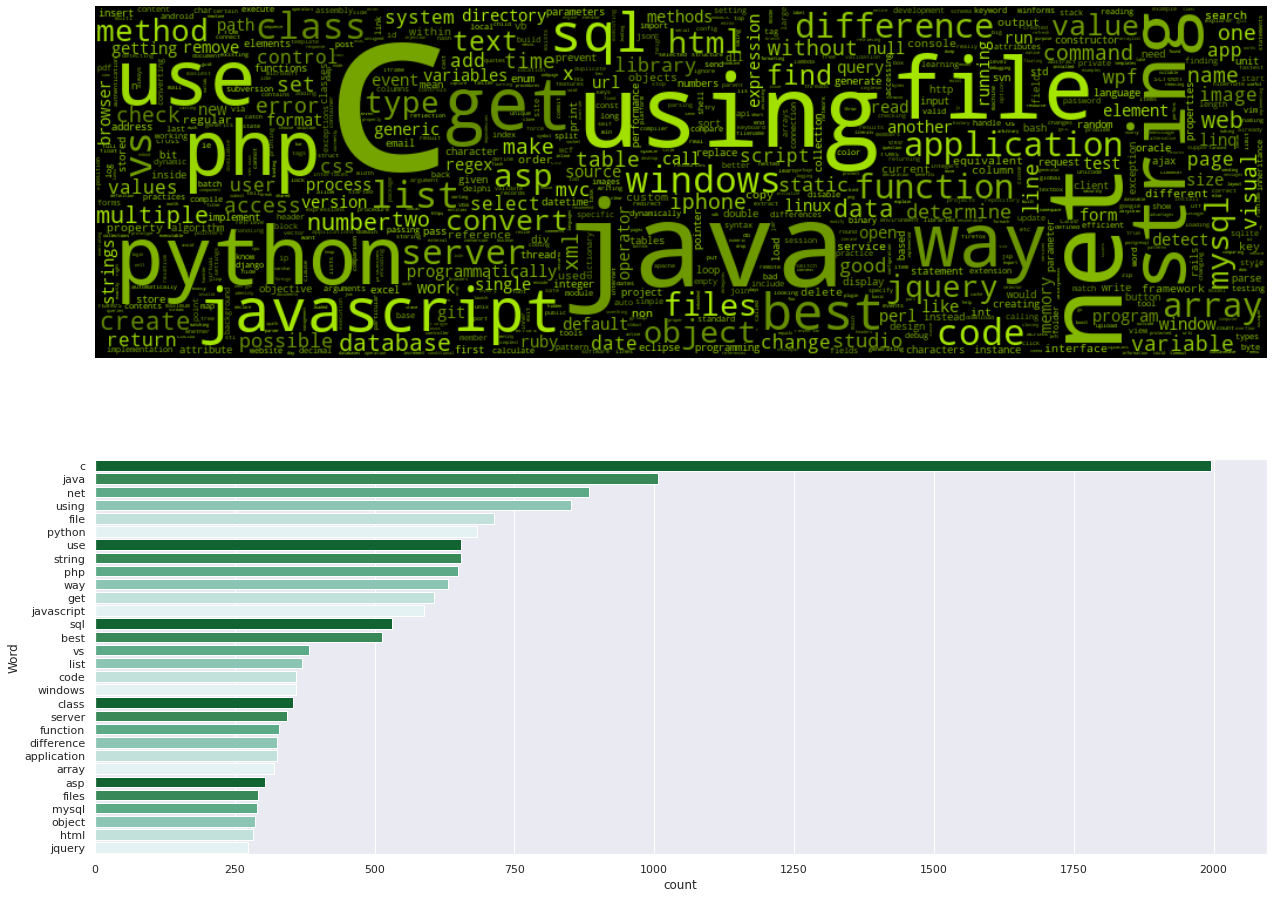

In [ ]:
freq_words(data_raw['clean_title'], 30)

In [ ]:
# get all genre tags in a list
all_tags = sum(data_raw['tags'],[])
len(set(all_tags))

4565

In [ ]:
all_tags = nltk.FreqDist(all_tags)
all_tags_df = pd.DataFrame({'Tag': list(all_tags.keys()), 'Count': list(all_tags.values())})


In [ ]:
sorted_tags = all_tags_df.sort_values(by='Count', ascending=False)
sort_tag=sorted_tags.head(50)

In [ ]:
tag_list=list(sort_tag['Tag'])   #top 50 tags

In [ ]:
data_raw

,tags,title,clean_title
0,"[c#, floating-point, type-conversion, double, ...",Convert Decimal to Double?,convert decimal to double
1,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...,percentage width child element in absolutely p...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?,how do i calculate someone s age in c
3,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#,calculate relative time in c
4,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone,determine a user s timezone
...,...,...,...
14995,"[ms-access, ms-access-2007]",Insert SQL command with Datetime in MS-Access,insert sql command with datetime in ms access
14996,"[sql, stored-procedures, function, plsql]",What is the difference between function and pr...,what is the difference between function and pr...
14997,"[browser, printing, webpage]",link to Print in a webpage,link to print in a webpage
14998,"[c#, visual-studio, visual-c++]",Using c++ library in c#,using c library in c


In [ ]:
#select only tags in tag_list

In [ ]:
data_raw_tag=data_raw

In [ ]:
data_raw_tag['tags'][0]

['c#', 'floating-point', 'type-conversion', 'double', 'decimal']

In [ ]:
for i in range(len(data_raw_tag)):
  tagg=data_raw_tag['tags'][i]
  new_tagg=[]
  for tg in range(len(tagg)):
    if(tagg[tg] in tag_list):
      new_tagg.append(tagg[tg])
  data_raw_tag['tags'][i]=new_tagg

In [ ]:
data_raw_tag

,tags,title,clean_title
0,[c#],Convert Decimal to Double?,convert decimal to double
1,"[html, css]",Percentage width child element in absolutely p...,percentage width child element in absolutely p...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?,how do i calculate someone s age in c
3,"[c#, datetime]",Calculate relative time in C#,calculate relative time in c
4,"[javascript, html]",Determine a User's Timezone,determine a user s timezone
...,...,...,...
14995,[],Insert SQL command with Datetime in MS-Access,insert sql command with datetime in ms access
14996,[sql],What is the difference between function and pr...,what is the difference between function and pr...
14997,[],link to Print in a webpage,link to print in a webpage
14998,"[c#, visual-studio]",Using c++ library in c#,using c library in c


In [ ]:
la=list(data_raw_tag['tags'])
count=0
for i in range(len(la)):
  if(la[i]!=[]):
    count+=1

In [ ]:
count #with 50 tags

13171

In [ ]:
tag_list

['c#',
 'java',
 '.net',
 'c++',
 'javascript',
 'python',
 'php',
 'c',
 'sql',
 'html',
 'asp.net',
 'sql-server',
 'jquery',
 'mysql',
 'windows',
 'string',
 'css',
 'regex',
 'iphone',
 'algorithm',
 'performance',
 'arrays',
 'database',
 'linux',
 'visual-studio',
 'winforms',
 'objective-c',
 'oop',
 'xml',
 'language-agnostic',
 'wpf',
 'ruby',
 'multithreading',
 'generics',
 'vb.net',
 'asp.net-mvc',
 'file',
 'linq',
 'git',
 'svn',
 'winapi',
 'cocoa-touch',
 'tsql',
 'bash',
 'reflection',
 'datetime',
 'security',
 'ajax',
 'perl',
 'version-control']

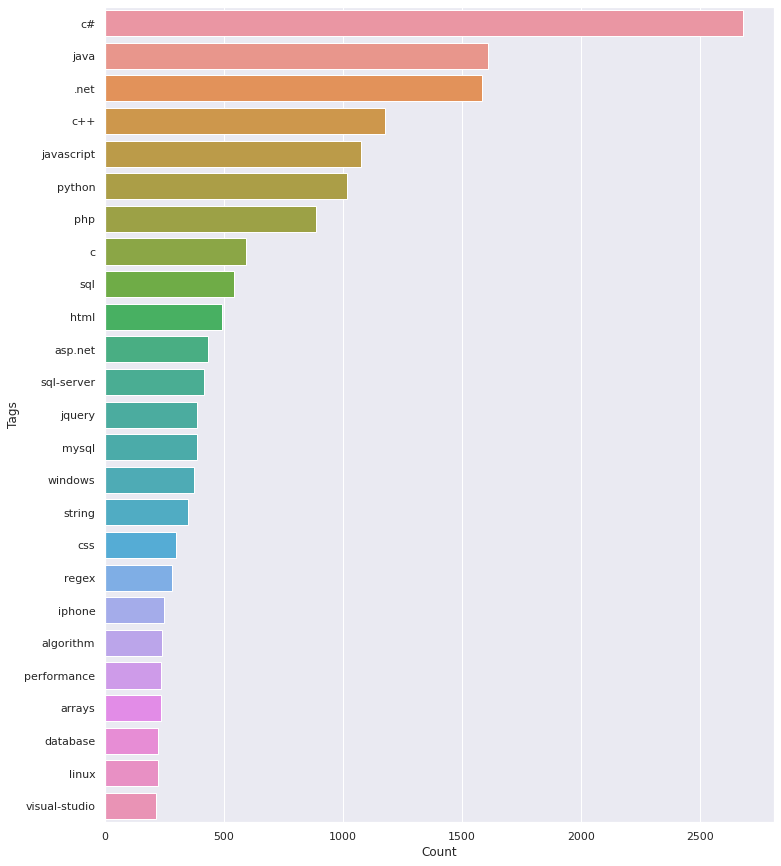

In [ ]:

g = sort_tag.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Tag")
ax.set(ylabel = 'Tags')
plt.show()

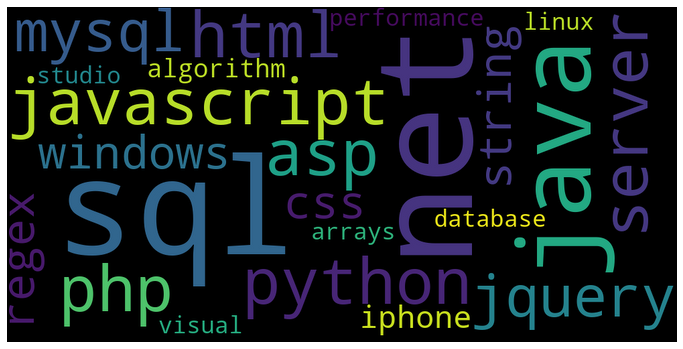

In [ ]:
text = " ".join(review for review in g.Tag)
wordcloud = WordCloud(width=1000, height=500,max_font_size=200).generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

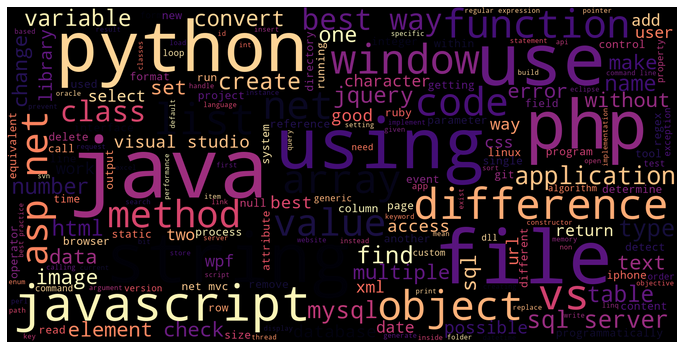

In [ ]:
text = " ".join(review for review in data_raw.clean_title)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [ ]:
#Text Mining Algorithms

In [ ]:
# Lemmatization process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
lemmatization process. 
'''
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lem

In [ ]:
# Defining a Count Vectorizer object
count_vec = CountVectorizer(stop_words='english', max_features=10000)
# Defining a TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), tokenizer=tokenize_and_lemmatize, max_features=10000, use_idf=True)

In [ ]:
data_raw.columns

Index(['tags', 'title', 'clean_title'], dtype='object')

In [ ]:
mb = MultiLabelBinarizer()
mb.fit(data_raw['tags'])
#mb.fit(sort)
y = mb.transform(data_raw['tags'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_raw['clean_title'], y, test_size=0.20, random_state=42)

In [ ]:
# Tf-Idf transformation 
xtrain_tfidf = tfidf_vec.fit_transform(X_train)
xtest_tfidf = tfidf_vec.transform(X_test)
xtrain_tfidf.shape

(12000, 10000)

In [ ]:
# Count Vectorizer transformation
xtrain_cv = count_vec.fit_transform(X_train)
xtest_cv = count_vec.transform(X_test)

In [ ]:
xtrain_cv.shape


(12000, 6384)

In [ ]:
evaluation_list=[]


In [ ]:
data_raw

,tags,title,clean_title
0,[c#],Convert Decimal to Double?,convert decimal to double
1,"[html, css]",Percentage width child element in absolutely p...,percentage width child element in absolutely p...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?,how do i calculate someone s age in c
3,"[c#, datetime]",Calculate relative time in C#,calculate relative time in c
4,"[javascript, html]",Determine a User's Timezone,determine a user s timezone
...,...,...,...
14995,[],Insert SQL command with Datetime in MS-Access,insert sql command with datetime in ms access
14996,[sql],What is the difference between function and pr...,what is the difference between function and pr...
14997,[],link to Print in a webpage,link to print in a webpage
14998,"[c#, visual-studio]",Using c++ library in c#,using c library in c


In [ ]:
#Logistic Regression
log_reg = LogisticRegression()
oneVsRest = OneVsRestClassifier(log_reg)
oneVsRest.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
mb = MultiLabelBinarizer()
mb.fit(data_raw['tags'])
#mb1.fit(sorted_tags)
y = mb.transform(data_raw['tags'])

In [ ]:
y.shape

(15000, 50)

In [ ]:
y_pred = oneVsRest.predict(xtest_tfidf)

def get_performance(y_test, y_pred):
    # Evaluate Performance
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    return accuracy, precision, recall, f1score

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 37.47
Precision : 0.8595971563981043
Recall    : 0.3623876123876124
F1-score   : 0.5098383696416022


In [ ]:
import timeit 

In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)


Title:  SQL server 2005 numeric precision loss 
Predicted tag:  [('sql-server',)]
Actual tag:  ['sql-server'] 

Title:  How do I add tab completion to the Python shell? 
Predicted tag:  [('python',)]
Actual tag:  ['python'] 

Title:  Is it possible to set an environment variable at runtime from Java? 
Predicted tag:  [('java',)]
Actual tag:  ['java'] 

Title:  php - How to force download of a file? 
Predicted tag:  [('php',)]
Actual tag:  ['php'] 

Title:  How do you return multiple values in Python? 
Predicted tag:  [('python',)]
Actual tag:  ['python'] 

Title:  How to wrap long lines without spaces in HTML? 
Predicted tag:  [('html',)]
Actual tag:  ['php', 'html', 'css'] 

Title:  Can I use a Regex in an XPath expression? 
Predicted tag:  [('regex',)]
Actual tag:  ['.net', 'xml', 'regex'] 

Title:  Best online resource to learn Python? 
Predicted tag:  [('python',)]
Actual tag:  ['python'] 

Title:  Can CSS choose a different default font and size depending on Language 
Predicted ta

In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Logistic Regression'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),
        ('time',round(times,3))
     ]))

In [ ]:
#Multinomial Naive Bayes
nbayes = MultinomialNB()
oneVsRest_nb = OneVsRestClassifier(nbayes)
oneVsRest_nb.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [ ]:
y_pred = oneVsRest_nb.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 14.57
Precision : 0.9135802469135802
Recall    : 0.03696303696303696
F1-score   : 0.07105136821891501


In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest_nb.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)

Title:  Why doesn't java.util.Set have get(int index)? 
Predicted tag:  [('java',)]
Actual tag:  ['java'] 

Title:  What are the differences between "generic" types in C++ and Java? 
Predicted tag:  [('c#',)]
Actual tag:  ['java', 'c++', 'generics'] 

Time:  0.01670303860000786


In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Multinomial Naive Bayes'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),('time',round(times,3))
     ]))

In [ ]:
#Linear SVC
linear_svc = LinearSVC()
oneVsRest_svc = OneVsRestClassifier(linear_svc)
oneVsRest_svc.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [ ]:
y_pred = oneVsRest_svc.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 43.03
Precision : 0.7712886209495102
Recall    : 0.5112387612387612
F1-score   : 0.6148993691799339


In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest_svc.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)

Title:  How do I disable the WPF WebBrowser control's click noise? 
Predicted tag:  [('c#', 'wpf')]
Actual tag:  ['.net', 'wpf'] 

Title:  XML Schema (XSD) validation tool? 
Predicted tag:  [('xml',)]
Actual tag:  ['xml'] 

Title:  TSQL Email Validation (without regex) 
Predicted tag:  [('regex', 'tsql')]
Actual tag:  ['sql-server', 'tsql'] 

Title:  Get an array of list element contents in jQuery 
Predicted tag:  [('jquery',)]
Actual tag:  ['javascript', 'jquery'] 

Title:  C# Telnet Library 
Predicted tag:  [('c', 'c#', 'c++')]
Actual tag:  ['c#', '.net'] 

Title:  LINQ-to-SQL vs stored procedures? 
Predicted tag:  [('linq', 'sql-server')]
Actual tag:  ['linq'] 

Title:  How do I programmatically check an item in a checkedlistbox in C#? 
Predicted tag:  [('c#',)]
Actual tag:  ['c#', 'winforms'] 

Title:  Java interface inheritance and implementation 
Predicted tag:  [('java', 'oop')]
Actual tag:  ['java'] 

Title:  Are nulls in a relational database okay? 
Predicted tag:  [('sql',)]


In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Linear Support vector machine'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),    ('time',round(times,3))

     ]))

In [ ]:
#Random Forest
rforest = RandomForestClassifier(n_estimators=100)
oneVsRest_rf = OneVsRestClassifier(rforest)
oneVsRest_rf.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                            

In [ ]:
y_pred = oneVsRest_rf.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 40.43
Precision : 0.8314214463840399
Recall    : 0.4163336663336663
F1-score   : 0.5548344150441005


In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = oneVsRest_rf.predict(text_vec)
    return mb.inverse_transform(y_pred)

start = timeit.default_timer()
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")
stop = timeit.default_timer()
times= stop - start
times=times/20
print('Time: ',times)

Title:  SQL Server: Is it possible to insert into two tables at the same time? 
Predicted tag:  [('sql', 'sql-server')]
Actual tag:  ['sql', 'sql-server'] 

Title:  SQL query: Simulating an "AND" over several rows instead of sub-querying 
Predicted tag:  [('sql',)]
Actual tag:  ['sql'] 

Title:  Learning Java EE, jboss, etc 
Predicted tag:  [('java',)]
Actual tag:  ['java'] 

Title:  WPF Custom Control with Item/Data Templates 
Predicted tag:  [('wpf',)]
Actual tag:  ['c#', 'wpf'] 

Title:  How to get current CPU and RAM usage in Python? 
Predicted tag:  [('python',)]
Actual tag:  ['python'] 

Title:  Calling Member Functions within Main C++ 
Predicted tag:  [('c++',)]
Actual tag:  ['c++'] 

Title:  Version control for version control? 
Predicted tag:  [('version-control',)]
Actual tag:  ['version-control'] 

Title:  Ajax Security 
Predicted tag:  [('javascript',)]
Actual tag:  ['javascript', 'ajax', 'security'] 

Title:  invoking a php method from java 
Predicted tag:  [('java', 'php'

In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'RandomForestClassifier'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2)),    ('time',round(times,3))
     ]))

In [ ]:
results = pd.DataFrame(data=evaluation_list)
results = results[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1','time']]
results = results.sort_values(by='Test Accuracy', ascending=False)
results = results.set_index('Model')
results

,Test Accuracy,Precision,Recall,F1,time
Model,,,,,
Linear Support vector machine,43.03,0.77,0.51,0.61,0.016
RandomForestClassifier,40.43,0.83,0.42,0.55,0.858
Logistic Regression,37.47,0.86,0.36,0.51,0.013
Multinomial Naive Bayes,14.57,0.91,0.04,0.07,0.017


In [ ]:
#optimization Grid-Search
param = {'estimator__penalty':['l1', 'l2'], 'estimator__C':[0.001, 0.01, 1, 10]}

In [ ]:
oneVsRest.get_params().keys()


dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [ ]:
# GridSearchCV
kf=KFold(n_splits=10, shuffle=True, random_state=55)
lr_grid = GridSearchCV(oneVsRest, param_grid = param, cv = kf, scoring='f1_micro', n_jobs=-1)
lr_grid.fit(xtrain_tfidf, y_train)

In [ ]:
# examine the best model
print(lr_grid.best_score_)
print(lr_grid.best_params_)
print(lr_grid.best_estimator_)

0.34830243805070094
{'estimator__C': 10, 'estimator__penalty': 'l2'}
OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)


In [ ]:
# Optimized Logistic Regression Model
log_reg = LogisticRegression(C=10, penalty='l2')
ovr = OneVsRestClassifier(log_reg)
ovr.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:

# performance metrics of the optimized model
y_pred = ovr.predict(xtest_tfidf)

accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 66.5
Precision : 0.7664613927048792
Recall    : 0.26989157631359467
F1-score   : 0.39921046138662725
